## INTRODUCTION
Exploring the Nigerian house dataset, in this notebook we will be exploring the dataset, cleaning it and finally building a model to predict the price of a house based on the features in the dataset.

This datasets contains Houses listings in Nigeria and their prices based on Location and other parameters.

Datashape (24326, 8)

Parameters:

bedrooms -> number of bedrooms in the houses

bathrooms -> number of bathrooms in the houses

toilets -> number of toilets

parking_space

title -> house type

town -> town in which the house is located

state -> state within Nigeria in which the house is located and finally

price -> the target column.

In [1]:
pip install XGBoost

  Using cached xgboost-2.0.2-py3-none-win_amd64.whl (99.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from ipywidgets import interact, IntSlider
import warnings

warnings.filterwarnings("ignore")

### Importing the Dataset

In [5]:
HousingPriceData = pd.read_csv("Nigeria_House_Dataset.csv")

In [6]:
HousingPriceData

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [8]:
HousingPriceData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


### Exploratory Data Analysis

In [17]:
HousingPriceData['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [21]:
Number_of_States = len(HousingPriceData['state'].unique())

print("The number of states in the dataset is", Number_of_States)

The number of states in the dataset is 25


<AxesSubplot:xlabel='state'>

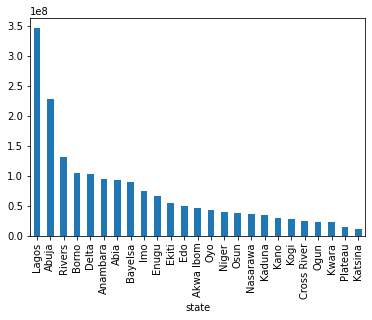

In [12]:
HousingPriceData.groupby('state')['price'].mean().sort_values(ascending=False).plot(kind='bar')

Lagos seems to be off the league of other states and this information may be because of possible outliers in the data. Lets see more confirmation

<AxesSubplot:xlabel='town'>

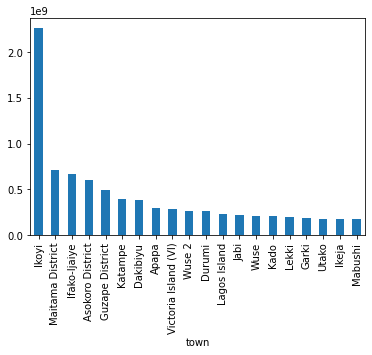

In [24]:
HousingPriceData.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

In [26]:
# Detecting suspected outlier
print(HousingPriceData[HousingPriceData["town"]=="Ikoyi"].max())
print(HousingPriceData[HousingPriceData["town"]=="Ifako-Ijaiye"].max())
print(HousingPriceData[HousingPriceData["town"]=="Ikeja"].max())

bedrooms                         9
bathrooms                        9
toilets                          9
parking_space                    9
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                         7
bathrooms                        8
toilets                          8
parking_space                    8
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object
bedrooms                         9
bathrooms                        9
toilets                          9
parking_space                    9
title            Terraced Duplexes
town                         Ikeja
state                        Lagos
price                 1440000000.0
dtype: object


In [28]:
trimmed_data = q1, q9 = HousingPriceData["price"].quantile([0.15,0.85])
mask_data = HousingPriceData["price"].between(q1,q9)
trimmed_data = HousingPriceData[mask_data]
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
8,1,1,1,1,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


The code first calculates the 15th and 85th percentiles of the "price" column in the data frame. Then, it creates a mask to select only the data points that fall between these two percentiles. Finally, it filters the data frame using the mask and assigns the result to the variable trimmed_data.

In other words, the code is trying to identify and remove outliers from the "price" column. Outliers are data points that are significantly different from the rest of the data. By removing outliers, we can get a more accurate picture of the overall distribution of the data.

In [29]:
trimmed_data['town'].unique()

array(['Lekki', 'Ajah', 'Oredo', 'Lokogoma District',
       'Victoria Island (VI)', 'Katampe', 'Magodo', 'Kaura', 'Galadimawa',
       'Gwarinpa', 'Yaba', 'Agege', 'Jahi', 'Orozo', 'Owerri North',
       'Ikeja', 'Idu Industrial', 'Owerri Municipal', 'Isheri North',
       'Utako', 'Guzape District', 'Port Harcourt', 'Isheri', 'Ibadan',
       'Ikoyi', 'Life Camp', 'Dape', 'Ejigbo', 'Isolo', 'Gaduwa', 'Dakwo',
       'Asokoro District', 'Chikun', 'Ojodu', 'Lugbe District', 'Wuye',
       'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Sango Ota',
       'Surulere', 'Obio-Akpor', 'Enugu', 'Apo', 'Ibeju Lekki', 'Wuse 2',
       'Mowe Town', 'Durumi', 'Simawa', 'Arepo', 'Mabushi', 'Alimosho',
       'Maryland', 'Karsana', 'Wuse', 'Karmo', 'Ifo', 'Gbagada', 'Idimu',
       'Maitama District', 'Gudu', 'Ikotun', 'Kukwaba', 'Mbora (Nbora)',
       'Jabi', 'Ikorodu', 'Kaduna South', 'Asaba', 'Uyo', 'Kosofe',
       'Ibafo', 'Ilupeju', 'Afijio', 'Ifako-Ijaiye', 'Ado-Ekiti', 'Ipaja',
       'Oluyo

In [30]:
Number_of_towns = len(trimmed_data['town'].unique())

print("The number of towns in the trimmed dataset is", Number_of_towns)

The number of towns in the trimmed dataset is 144


In [31]:
records = trimmed_data['state'].value_counts()
records

Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Abia             5
Ekiti            5
Nasarawa         4
Kogi             4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: state, dtype: int64

At this point we need to remove states with less than 100 entries 

In [32]:
# remove the states with few entries
trimmed_data = trimmed_data[~trimmed_data['state'].isin(records[records < 100].index)]

In [33]:
trimmed_data['state'].value_counts()

Lagos     13805
Abuja      2462
Rivers      339
Oyo         229
Imo         195
Ogun        141
Name: state, dtype: int64

<AxesSubplot:title={'center':'Most Expensive towns in nigeria'}, xlabel='town'>

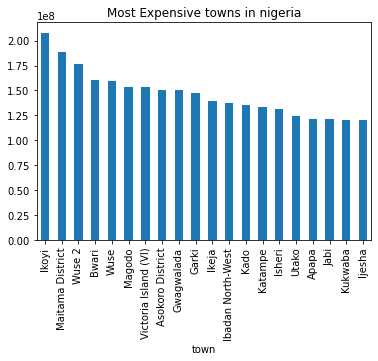

In [34]:
trimmed_data.groupby('town')['price'].mean().sort_values(ascending=False).head(20).plot(kind='bar', title="Most Expensive towns in nigeria")

This is a plot of top 20 most expensive towns in Nigeria

In [35]:
trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] + trimmed_data['parking_space']

In [36]:
trimmed_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,total_rooms
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,18
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,19
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,15
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0,18
8,1,1,1,1,Detached Duplex,Lekki,Lagos,200000000.0,4
...,...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0,18
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0,16
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0,18
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0,14


<AxesSubplot:>

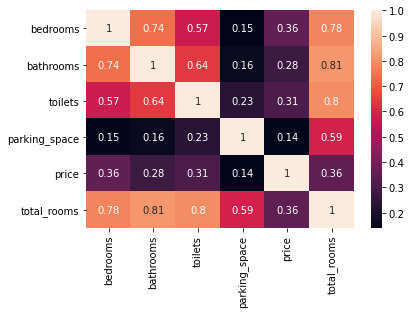

In [37]:
corr = trimmed_data.corr()
sns.heatmap(corr, annot=True)

In [38]:
print(corr)

               bedrooms  bathrooms   toilets  parking_space     price  \
bedrooms       1.000000   0.739923  0.571015       0.145919  0.356347   
bathrooms      0.739923   1.000000  0.642284       0.161377  0.276956   
toilets        0.571015   0.642284  1.000000       0.234386  0.313762   
parking_space  0.145919   0.161377  0.234386       1.000000  0.140579   
price          0.356347   0.276956  0.313762       0.140579  1.000000   
total_rooms    0.779405   0.813967  0.797351       0.593667  0.355218   

               total_rooms  
bedrooms          0.779405  
bathrooms         0.813967  
toilets           0.797351  
parking_space     0.593667  
price             0.355218  
total_rooms       1.000000  


In [39]:
trimmed_data.drop(columns=['parking_space', 'title', 'town', 'state'], inplace = True)

In [40]:
# removing outliers
trim = q1, q9 = trimmed_data["price"].quantile([0.1, 0.9])
mask = trimmed_data["price"].between(q1,q9)
trimmed_data = trimmed_data[mask]

In [41]:
trimmed_data

,bedrooms,bathrooms,toilets,price,total_rooms
2,4,5,5,120000000.0,18
4,4,4,5,75000000.0,15
6,4,5,5,65000000.0,18
9,4,4,5,60000000.0,18
12,4,5,6,65000000.0,18
...,...,...,...,...,...
24318,4,5,5,110000000.0,18
24320,3,4,4,80000000.0,16
24323,4,5,5,68000000.0,18
24324,3,4,4,78000000.0,14


In [42]:
trimmed_data['total_rooms'] = trimmed_data['bedrooms'] + trimmed_data['bathrooms'] + trimmed_data['toilets'] 

In [43]:
trimmed_data

,bedrooms,bathrooms,toilets,price,total_rooms
2,4,5,5,120000000.0,14
4,4,4,5,75000000.0,13
6,4,5,5,65000000.0,14
9,4,4,5,60000000.0,13
12,4,5,6,65000000.0,15
...,...,...,...,...,...
24318,4,5,5,110000000.0,14
24320,3,4,4,80000000.0,11
24323,4,5,5,68000000.0,14
24324,3,4,4,78000000.0,11


In [44]:
trimmed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14178 entries, 2 to 24325
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14178 non-null  int64  
 1   bathrooms    14178 non-null  int64  
 2   toilets      14178 non-null  int64  
 3   price        14178 non-null  float64
 4   total_rooms  14178 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 664.6 KB


In [45]:
trimmed_data.describe()

,bedrooms,bathrooms,toilets,price,total_rooms
count,14178.000000,14178.000000,14178.000000,1.417800e+04,14178.000000
mean,4.434758,4.695444,5.322471,9.507124e+07,14.452673
std,0.864044,0.938578,0.954035,3.670868e+07,2.379890
min,1.000000,1.000000,1.000000,4.500000e+07,3.000000
25%,4.000000,4.000000,5.000000,6.500000e+07,13.000000
50%,4.000000,5.000000,5.000000,8.500000e+07,14.000000
75%,5.000000,5.000000,6.000000,1.250000e+08,16.000000
max,9.000000,9.000000,9.000000,1.800000e+08,27.000000


### Model Selection and Building

In [46]:
X = trimmed_data.drop('price', axis = 1)
y = trimmed_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN Regression': KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: ")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R2 Score: {r2:.4f}")

Linear Regression: 
  Mean Squared Error: 1174665373980418.2500
  R2 Score: 0.1413
Ridge Regression: 
  Mean Squared Error: 1175056200735318.0000
  R2 Score: 0.1410
Lasso Regression: 
  Mean Squared Error: 1175051652488379.5000
  R2 Score: 0.1410
Elastic Net Regression: 
  Mean Squared Error: 1193618489263355.2500
  R2 Score: 0.1274
Decision Tree Regression: 
  Mean Squared Error: 1076993542373403.5000
  R2 Score: 0.2127
Random Forest Regression: 
  Mean Squared Error: 1072724657001764.1250
  R2 Score: 0.2158
Gradient Boosting Regression: 
  Mean Squared Error: 1066885017540497.8750
  R2 Score: 0.2201
SVR: 
  Mean Squared Error: 1479370505583103.7500
  R2 Score: -0.0814
KNN Regression: 
  Mean Squared Error: 1318526250084937.7500
  R2 Score: 0.0361


In [47]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print("Mean price:", y_mean)
print("Baseline MSE:", mean_squared_error(y_train, y_pred_baseline))

Mean price: 94950130.76697232
Baseline MSE: 1342225635426989.5


The best model here is Gradient Boosting Regressor which has the lowest MSE, this means that it is making predictions that are closer to the actual values on average compared to other models, and it has the highest R2 score which means that it is explaining the variance in the data better than other models

### Hyperparameter Tuning

GridSearchCV

In [48]:
gbr = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [150, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3]
}

grid_search = GridSearchCV(estimator = gbr, param_grid = param_grid, cv = 5, n_jobs = -1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 100, 200]})

In [49]:
best_params = grid_search.best_params_
print("Best Hyperparameter: ", best_params)

Best Hyperparameter:  {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [50]:
best_grid = grid_search.best_estimator_
best_grid

GradientBoostingRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=3)

Testing the best model on the dataset

In [51]:
y_pred = best_grid.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}")

  Mean Squared Error: 1066996973910721.8750
  R2 Score: 0.2200


RandomSearchCV

In [52]:
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
    # Add other hyperparameters to explore
}

random_search = RandomizedSearchCV(gbr, param_distributions, n_iter=100, cv = 5, n_jobs = -1)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]})

In [55]:
best_params_randCV = random_search.best_params_
print("Best Hyperparameters:", best_params_randCV)

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}


In [56]:
best_grid_randCV = random_search.best_estimator_
best_grid_randCV

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, max_features='log2',
                          min_samples_leaf=4, min_samples_split=5,
                          n_estimators=300, subsample=0.8)

In [57]:
y_pred = best_grid_randCV.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.4f}")
print(f"  R2 Score: {r2:.4f}")

  Mean Squared Error: 1067898254927092.7500
  R2 Score: 0.2193


We will be going with the RandomSearch Parameters, its kind of tricky the BaseLine model sets the standard and all the models did well, but GradientBoostRegressor was the best and then tuning the hyperparameters a little bit

It seems as thought the hyperparameters gave us a little higher MSE and a little lower r2score, just to avoid overfitting it would be accepted

In [68]:
# testing the model

def make_prediction(bedrooms, bathrooms, toilets, total_rooms):

    data = {"bedrooms":bedrooms,
            "bathrooms":bathrooms,
            "toilets":toilets,
            "total_rooms":total_rooms
    }
    
    df = pd.DataFrame(data, index=[0])
    prediction = best_grid_randCV.predict(df)
    return f"Predicted apartment price: ₦{prediction}"

In [70]:
# testing 
make_prediction(bedrooms = 3, bathrooms = 4,toilets = 6, total_rooms = 13)

'Predicted apartment price: ₦[78228416.36125213]'

In [65]:
custom_font_style = {
    'font-family': 'Arial',   
    'font-size': '20px'      
}

interact(
    make_prediction,    
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
        style=custom_font_style
    ),
    bathrooms=IntSlider(
        min=X_train["bathrooms"].min(),
        max=X_train["bathrooms"].max(),
        step=1,
        value=X_train["bathrooms"].mean(),
        style=custom_font_style
    ),
    toilets=IntSlider(
        min=X_train["toilets"].min(),
        max=X_train["toilets"].max(),
        step=1,
        value=X_train["toilets"].mean(),
        style=custom_font_style
    ),
    total_rooms=IntSlider(
        min=X_train["total_rooms"].min(),
        max=X_train["total_rooms"].max(),
        step=1,
        value=X_train["total_rooms"].mean(),
        style=custom_font_style
    )
    
);

interactive(children=(IntSlider(value=4, description='bedrooms', max=9, min=1), IntSlider(value=4, description…